In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
# Define model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Storage for gradient norms and loss
grad_norms = []
losses = []

def compute_grad_norm(model):
    grad_all = 0.0
    for p in model.parameters():
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
    grad_norm = grad_all ** 0.5
    return grad_norm

In [6]:
# Training loop
num_epochs = 5  
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()  # Zero out gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        
        # optimizer
        optimizer.step()
        
        # Recording loss
        losses.append(loss.item())
        
        # Compute and record the gradient norm
        grad_norm = compute_grad_norm(model)
        grad_norms.append(grad_norm)

        # Printing the iteration, loss, and gradient norm every 1000 iterations
        if i % 1000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Iteration [{i}], Loss: {loss.item()}, Grad Norm: {grad_norm}")


Epoch [1/5], Iteration [0], Loss: 2.283766984939575, Grad Norm: 0.6240642678643952
Epoch [2/5], Iteration [0], Loss: 0.36415860056877136, Grad Norm: 2.150747375060433
Epoch [3/5], Iteration [0], Loss: 0.31061869859695435, Grad Norm: 1.5186414454851123
Epoch [4/5], Iteration [0], Loss: 0.28663474321365356, Grad Norm: 2.242726775357251
Epoch [5/5], Iteration [0], Loss: 0.16599644720554352, Grad Norm: 1.1633073425898308


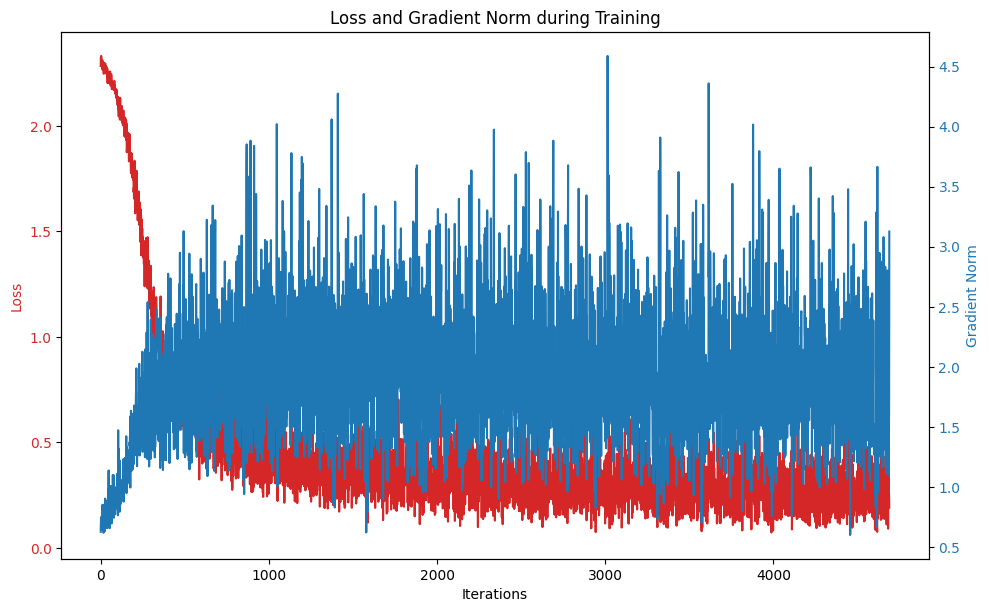

In [7]:
# Plot loss and gradient norm over iterations
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color=color)
ax1.plot(losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)  
ax2.plot(grad_norms, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title("Loss and Gradient Norm during Training")
plt.show()